# EDA csv

In [3]:
import pandas as pd

In [1]:
import pandas as pd
import glob

# Path ไปที่โฟลเดอร์ rml_csv
csv_files = glob.glob("/Users/gusgoodman/Documents/V89/rml_csv/*.csv")

# โหลดและรวมเป็น DataFrame เดียว
df_list = [pd.read_csv(f) for f in csv_files]
df_all = pd.concat(df_list, ignore_index=True)

print(f"Total rows: {len(df_all)}")
print(f"Total files combined: {len(csv_files)}")

Total rows: 6817
Total files combined: 6


In [2]:
# แสดงชื่อคอลัมน์ทั้งหมด
print("Columns:", df_all.columns.tolist())

# ดู 5 แถวแรก
print(df_all.head())

# ดูข้อมูลเบื้องต้น เช่น datatype, null values
print(df_all.info())


Columns: ['patient_id', 'event_id', 'family', 'type', 'start_sec', 'duration_sec', 'end_sec', 'segment_index', 'segment_local_start_sec', 'recording_start_iso']
   patient_id  event_id family         type  start_sec  duration_sec  end_sec  \
0         999         0   User         Gain        0.0           0.0      0.0   
1         999         1   User  ChannelFail        0.0           6.0      6.0   
2         999         2  Nasal        Snore        3.0           4.5      7.5   
3         999         3   User         Gain       21.0           0.0     21.0   
4         999         4   User         Gain       26.0           0.0     26.0   

   segment_index  segment_local_start_sec  recording_start_iso  
0              0                      0.0  2019-04-19T08:43:41  
1              0                      0.0  2019-04-19T08:43:41  
2              0                      3.0  2019-04-19T08:43:41  
3              0                     21.0  2019-04-19T08:43:41  
4              0           

Arousal                 1491
Bradycardia              965
ObstructiveApnea         649
LongRR                   622
PttDrop                  609
ChannelFail              442
RelativeDesaturation     435
LegMovement              420
Hypopnea                 398
Snore                    279
Gain                     209
Tachycardia              188
MixedApnea                72
CentralApnea              38
Name: type, dtype: int64
Arousal                 21.871791
Bradycardia             14.155787
ObstructiveApnea         9.520317
LongRR                   9.124248
PttDrop                  8.933548
ChannelFail              6.483791
RelativeDesaturation     6.381106
LegMovement              6.161068
Hypopnea                 5.838345
Snore                    4.092709
Gain                     3.065865
Tachycardia              2.757811
MixedApnea               1.056183
CentralApnea             0.557430
Name: type, dtype: float64


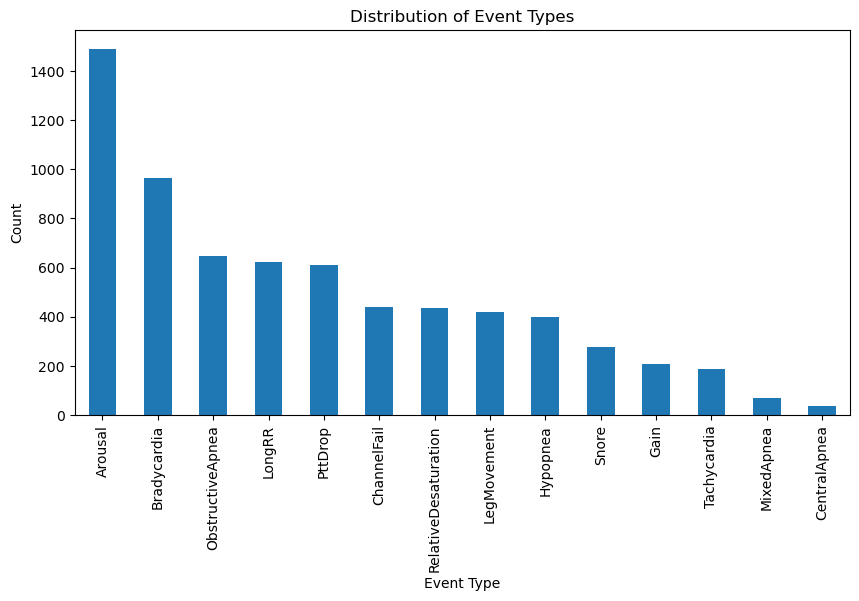

In [4]:
# นับจำนวนเหตุการณ์แต่ละประเภท
print(df_all['type'].value_counts())

# ถ้าต้องการดูในรูปเปอร์เซ็นต์
print(df_all['type'].value_counts(normalize=True) * 100)

# ถ้าต้องการดูเป็นกราฟ
import matplotlib.pyplot as plt

df_all['type'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Event Types")
plt.xlabel("Event Type")
plt.ylabel("Count")
plt.show()


In [11]:
df_all['type'].value_counts()

Arousal                 1491
Bradycardia              965
ObstructiveApnea         649
LongRR                   622
PttDrop                  609
ChannelFail              442
RelativeDesaturation     435
LegMovement              420
Hypopnea                 398
Snore                    279
Gain                     209
Tachycardia              188
MixedApnea                72
CentralApnea              38
Name: type, dtype: int64

In [14]:
df_all

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,999,0,User,Gain,0.0,0.0,0.0,0,0.0,2019-04-19T08:43:41
1,999,1,User,ChannelFail,0.0,6.0,6.0,0,0.0,2019-04-19T08:43:41
2,999,2,Nasal,Snore,3.0,4.5,7.5,0,3.0,2019-04-19T08:43:41
3,999,3,User,Gain,21.0,0.0,21.0,0,21.0,2019-04-19T08:43:41
4,999,4,User,Gain,26.0,0.0,26.0,0,26.0,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
6812,995,1095,Respiratory,Hypopnea,17820.5,11.5,17832.0,4,3420.5,2019-04-17T22:35:00
6813,995,1096,Cardiac,PttDrop,17837.0,13.0,17850.0,4,3437.0,2019-04-17T22:35:00
6814,995,1097,User,Gain,17839.0,0.0,17839.0,4,3439.0,2019-04-17T22:35:00
6815,995,1098,Neuro,Arousal,17842.5,4.5,17847.0,4,3442.5,2019-04-17T22:35:00


# Create new CSV that has only respiratory class

In [15]:
import pandas as pd
import os

input_folder = "/Users/gusgoodman/Documents/V89/rml_csv"
output_folder = "/Users/gusgoodman/Documents/V89/rml_csv_respiratory"
os.makedirs(output_folder, exist_ok=True)

# Respiratory target classes
resp_classes = ["ObstructiveApnea", "CentralApnea", "MixedApnea", "Hypopnea"]

for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join(input_folder, file))
        
        # Keep only respiratory events
        df_filtered = df[df['type'].isin(resp_classes)]
        
        if not df_filtered.empty:
            df_filtered.to_csv(os.path.join(output_folder, file), index=False)

print("Filtering complete. Saved to:", output_folder)


Filtering complete. Saved to: /Users/gusgoodman/Documents/V89/rml_csv_respiratory


In [16]:
import pandas as pd
import os

# Folder containing per-patient CSVs
input_folder = "/Users/gusgoodman/Documents/V89/rml_csv"

# Output file
output_file = "/Users/gusgoodman/Documents/V89/respiratory_events_all.csv"

# Target respiratory event types
resp_classes = ["ObstructiveApnea", "CentralApnea", "MixedApnea", "Hypopnea"]

# List to store filtered data from each patient
all_data = []

# Iterate over each CSV in the folder
for file in os.listdir(input_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(input_folder, file)
        df = pd.read_csv(file_path)

        # Keep only respiratory events
        df_filtered = df[df['type'].isin(resp_classes)].copy()

        # Add patient ID
        df_filtered['patient_id'] = file.replace(".csv", "")

        all_data.append(df_filtered)

# Combine all filtered data
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"Saved combined respiratory events to: {output_file}")
    print(f"Total events: {len(combined_df)}")
    print(combined_df['type'].value_counts())
else:
    print("No respiratory events found in any patient CSV.")


Saved combined respiratory events to: /Users/gusgoodman/Documents/V89/respiratory_events_all.csv
Total events: 1157
ObstructiveApnea    649
Hypopnea            398
MixedApnea           72
CentralApnea         38
Name: type, dtype: int64


In [17]:
combined_df

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,00000999,20,Respiratory,ObstructiveApnea,155.0,17.0,172.0,0,155.0,2019-04-19T08:43:41
1,00000999,33,Respiratory,ObstructiveApnea,209.0,19.0,228.0,0,209.0,2019-04-19T08:43:41
2,00000999,39,Respiratory,ObstructiveApnea,264.5,14.0,278.5,0,264.5,2019-04-19T08:43:41
3,00000999,44,Respiratory,ObstructiveApnea,295.5,12.5,308.0,0,295.5,2019-04-19T08:43:41
4,00000999,49,Respiratory,ObstructiveApnea,347.0,11.5,358.5,0,347.0,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
1152,00000995,1074,Respiratory,ObstructiveApnea,17610.0,10.0,17620.0,4,3210.0,2019-04-17T22:35:00
1153,00000995,1078,Respiratory,ObstructiveApnea,17642.5,16.0,17658.5,4,3242.5,2019-04-17T22:35:00
1154,00000995,1082,Respiratory,ObstructiveApnea,17682.0,18.5,17700.5,4,3282.0,2019-04-17T22:35:00
1155,00000995,1095,Respiratory,Hypopnea,17820.5,11.5,17832.0,4,3420.5,2019-04-17T22:35:00


# Load DataSet

In [26]:
df = pd.read_csv("/Users/gusgoodman/Documents/V89/snore-apnea-analyze/EDF_RML/data_csv/respiratory_plus_normal.csv")
df

,patient_id,event_id,family,type,start_sec,duration_sec,end_sec,segment_index,segment_local_start_sec,recording_start_iso
0,999,20,Respiratory,ObstructiveApnea,155.000,17.0,172.000,0,155.000,2019-04-19T08:43:41
1,999,33,Respiratory,ObstructiveApnea,209.000,19.0,228.000,0,209.000,2019-04-19T08:43:41
2,999,39,Respiratory,ObstructiveApnea,264.500,14.0,278.500,0,264.500,2019-04-19T08:43:41
3,999,44,Respiratory,ObstructiveApnea,295.500,12.5,308.000,0,295.500,2019-04-19T08:43:41
4,999,49,Respiratory,ObstructiveApnea,347.000,11.5,358.500,0,347.000,2019-04-19T08:43:41
...,...,...,...,...,...,...,...,...,...,...
2064,999,-1,Normal,Normal,9385.342,16.5,9401.842,2,2185.342,2019-04-19T08:43:41
2065,999,-1,Normal,Normal,3995.079,15.0,4010.079,1,395.079,2019-04-19T08:43:41
2066,999,-1,Normal,Normal,14836.353,12.5,14848.853,4,436.353,2019-04-19T08:43:41
2067,999,-1,Normal,Normal,1199.751,12.5,1212.251,0,1199.751,2019-04-19T08:43:41
